In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load data
df = pd.read_csv('../data/raw/data.csv')
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


Basic Data Overview:

In [3]:
# 1. Structure understanding
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")

# 2. Summary statistics
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"\nNumerical columns: {numerical_cols.tolist()}")
print(f"Categorical columns: {categorical_cols.tolist()}")

# Basic stats
df.describe(include='all').T

Shape: (95662, 16)

Columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

Data types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Missing values:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode       

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Distribution Analysis:

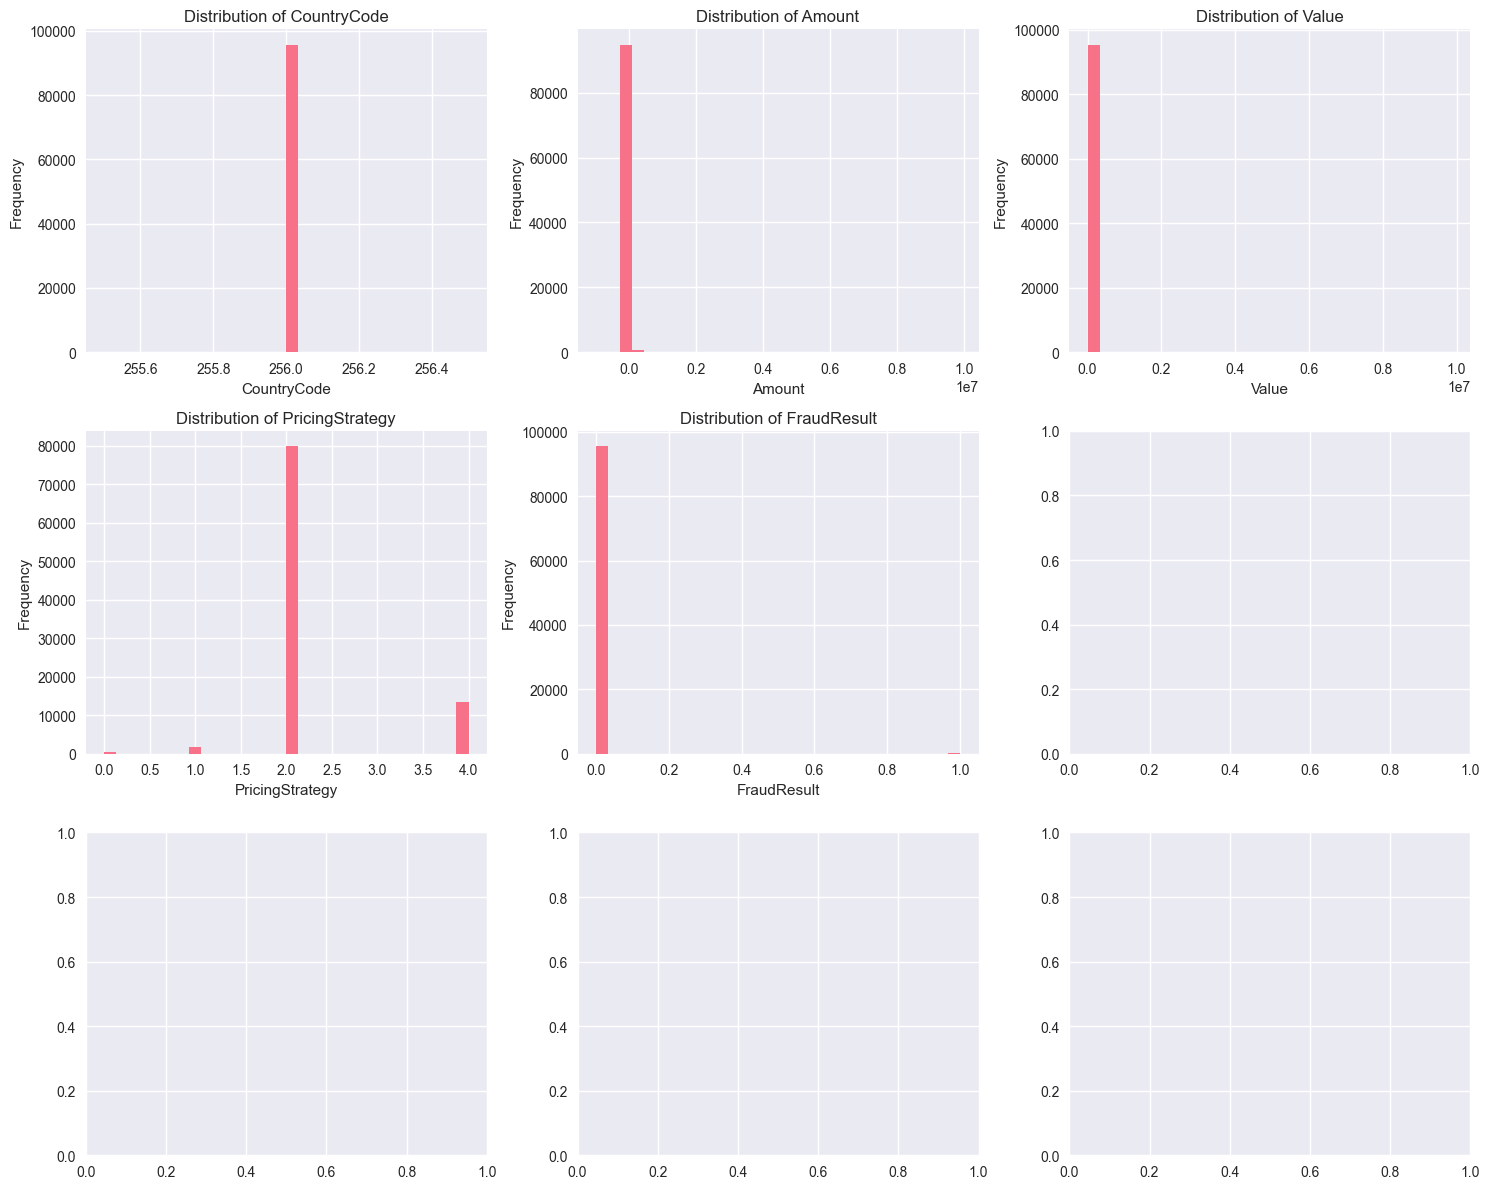

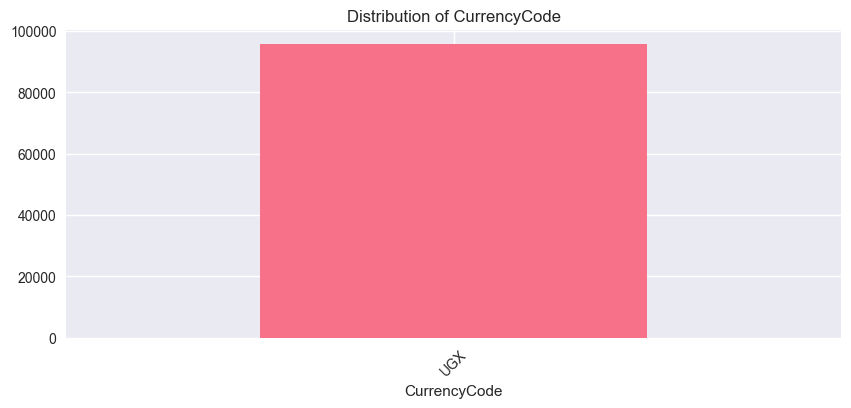

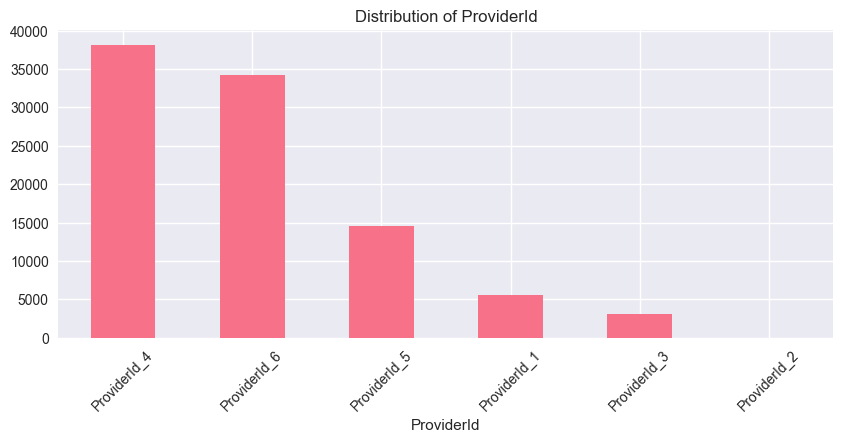

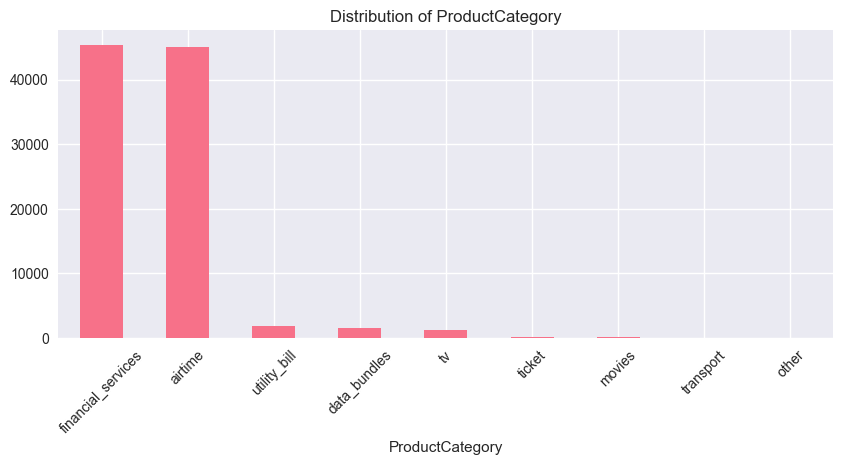

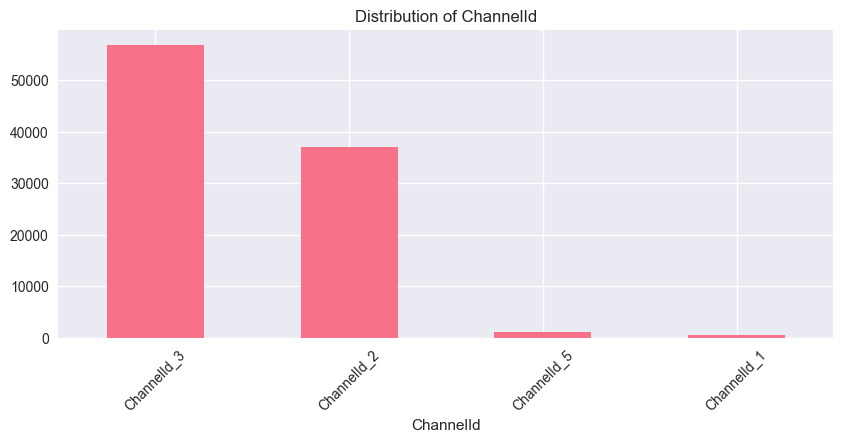

In [4]:
# Numerical distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:9]):
    if col in df.columns:
        df[col].hist(ax=axes[idx], bins=30)
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Categorical distributions
for col in categorical_cols:
    if df[col].nunique() < 20:  # For columns with reasonable unique values
        plt.figure(figsize=(10, 4))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        plt.show()

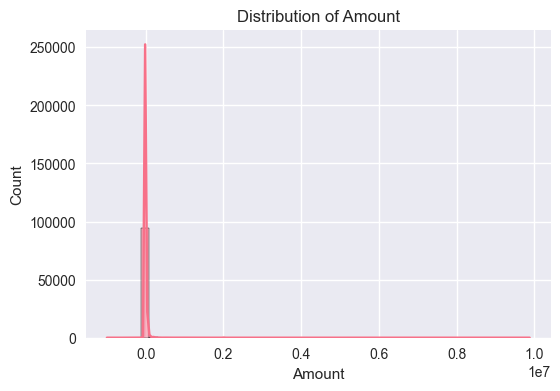

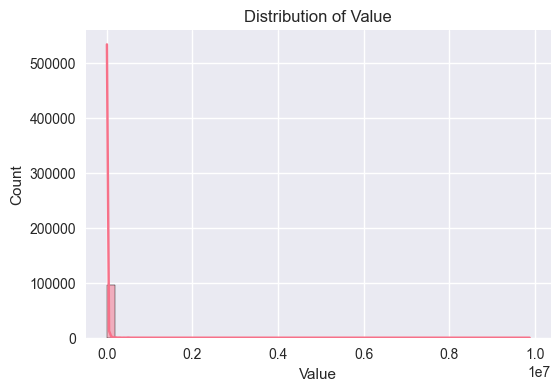

In [5]:
numerical_cols = ["Amount", "Value"]

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


Correlation Analysis:

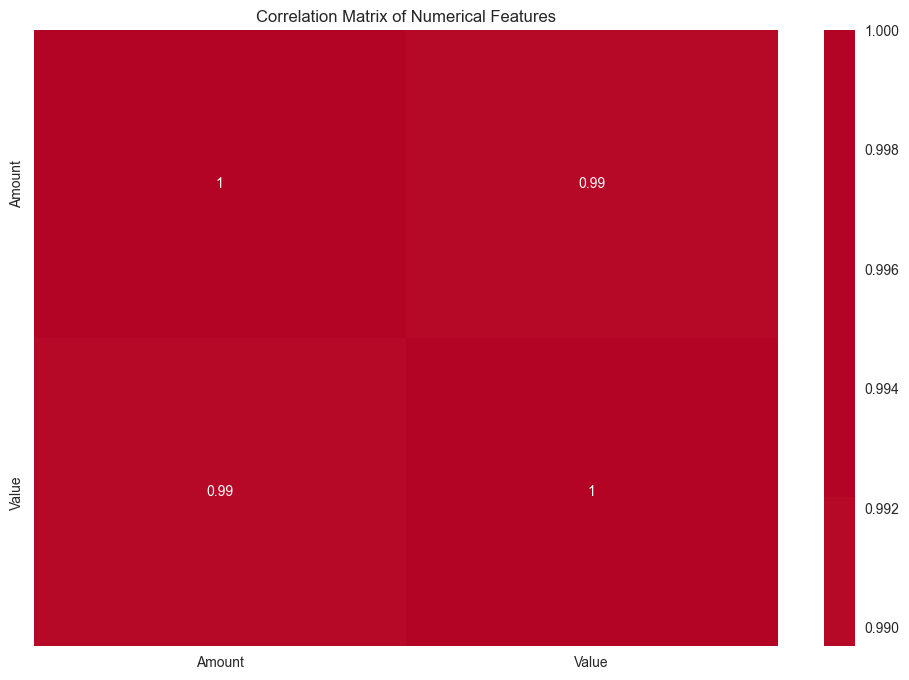

Strong correlations (|r| > 0.5):
Amount  Value     0.989692
Value   Amount    0.989692
dtype: float64


In [7]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Top correlations
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs = strong_pairs[strong_pairs < 1]  # Remove self-correlations

print("Strong correlations (|r| > 0.5):")
print(strong_pairs)

Missing Values Analysis:

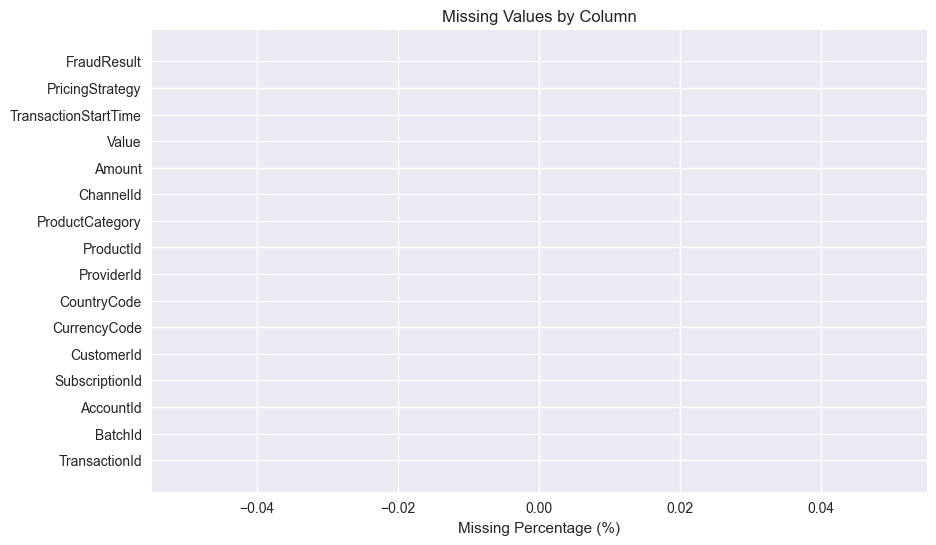

In [8]:
# Missing values visualization
missing_df = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df)) * 100
}).sort_values('missing_percentage', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(missing_df['column'], missing_df['missing_percentage'])
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Values by Column')
plt.show()

In [9]:
df.isnull().mean().sort_values(ascending=False)


TransactionId           0.0
BatchId                 0.0
AccountId               0.0
SubscriptionId          0.0
CustomerId              0.0
CurrencyCode            0.0
CountryCode             0.0
ProviderId              0.0
ProductId               0.0
ProductCategory         0.0
ChannelId               0.0
Amount                  0.0
Value                   0.0
TransactionStartTime    0.0
PricingStrategy         0.0
FraudResult             0.0
dtype: float64

Outlier Detection:

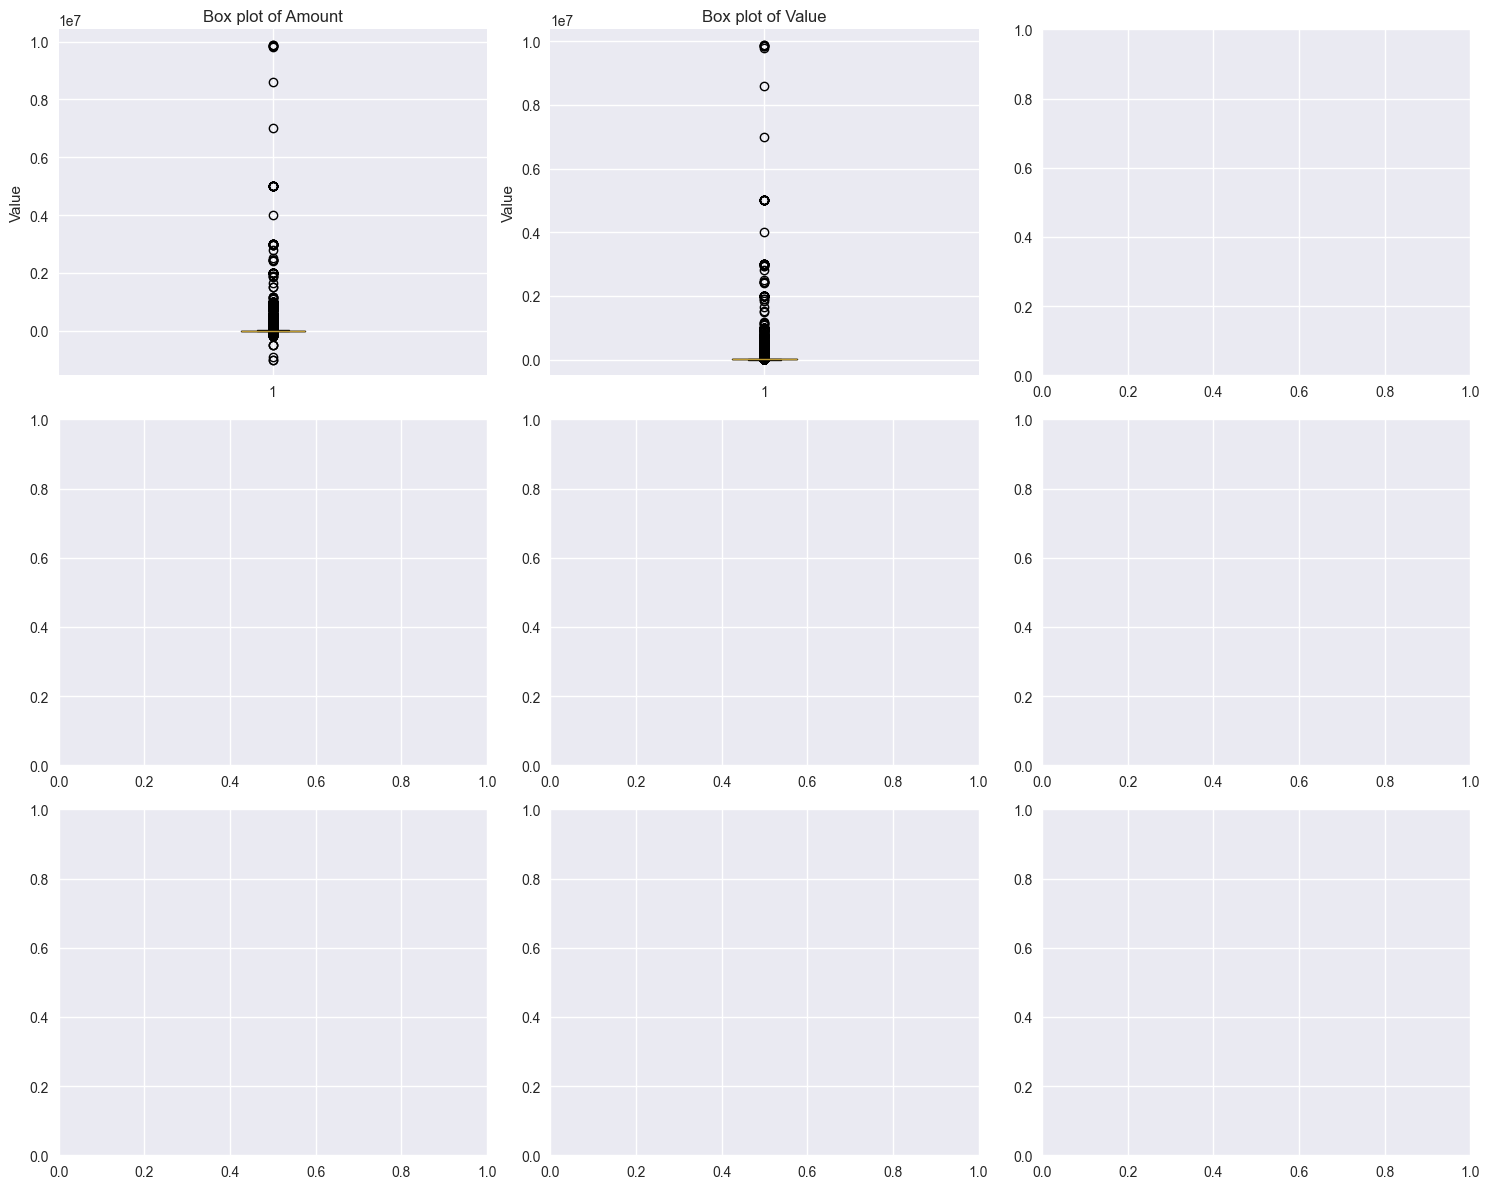


Amount:
Lower bound: -4325.00, Upper bound: 7075.00
Number of outliers: 24441 (25.55%)

Value:
Lower bound: -6812.50, Upper bound: 12087.50
Number of outliers: 9021 (9.43%)


In [10]:
# Box plots for numerical columns
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:9]):
    if col in df.columns:
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(f'Box plot of {col}')
        axes[idx].set_ylabel('Value')

plt.tight_layout()
plt.show()

# IQR method for outlier detection
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in ['Amount', 'Value']:
    outliers, lb, ub = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"Lower bound: {lb:.2f}, Upper bound: {ub:.2f}")
    print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

Top 5 Insights from EDA:
1. Highly Imbalanced Fraud Detection & Single Currency Operation
Fraud incidence is extremely rare: Only 0.2% of transactions (FraudResult mean = 0.002) are flagged as fraudulent, creating a severe class imbalance that will require specialized sampling techniques (SMOTE, class weighting) for effective model training.

Single currency market: All transactions use UGX (Ugandan Shilling), eliminating currency risk but also limiting the model's applicability to multi-currency scenarios. This suggests the eCommerce platform operates exclusively in Uganda.

2. Significant Transaction Amount Skewness with High Outlier Presence
Heavy right-skewed distribution: Transaction amounts show extreme positive skewness (mean: 6,717 UGX vs median: 1,000 UGX), with a maximum transaction of 9.88 million UGX - indicating the presence of high-value outliers.

Substantial outlier impact: 25.55% of Amount values and 9.43% of Value values are outliers by IQR method, suggesting a mix of regular purchases and occasional large transactions that could represent business customers or bulk purchases.

3. Perfect Correlation Between Amount and Value Requires Feature Simplification
Near-perfect correlation (0.99): Amount and Value columns are essentially duplicates with different signs (Amount can be negative for credits, Value is absolute). This redundancy suggests dropping one column to avoid multicollinearity issues in linear models.

Credit/Debit pattern indication: Negative Amount values represent credits to customer accounts, providing insights into refunds or account top-ups behavior.

4. Customer Concentration and Channel Dominance Patterns
High customer concentration: A few customers dominate transaction volume (CustomerId_7343 appears 4,091 times), suggesting either business customers or highly active individual users.

Channel preference clear: ChannelId_3 accounts for 59.5% of transactions (56,935 of 95,662), indicating a strong platform preference (likely mobile app vs web).

Product category dominance: Financial services represent 47.5% of transactions, followed by other categories, suggesting the platform's core business is financial transactions rather than traditional eCommerce.

5. Clean Dataset with Structural Insights for Feature Engineering
Exceptionally clean data: Zero missing values across all 95,662 records and 16 columns - unusual for real-world financial data, possibly indicating pre-processing or synthetic data.

Time-based feature potential: TransactionStartTime shows 94,556 unique timestamps (99% uniqueness), allowing for rich temporal feature engineering (hourly, daily, weekly patterns).

Provider concentration: ProviderId_4 handles 39.9% of transactions, indicating partnership or integration patterns that could influence risk assessment.

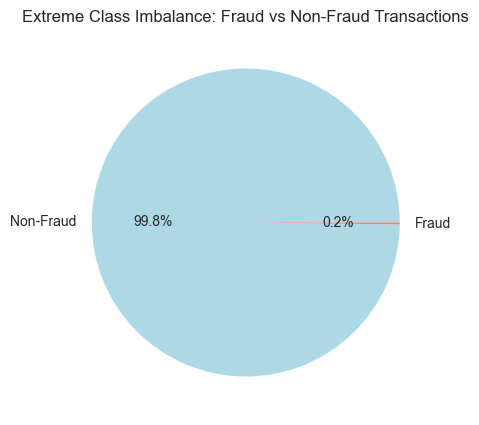

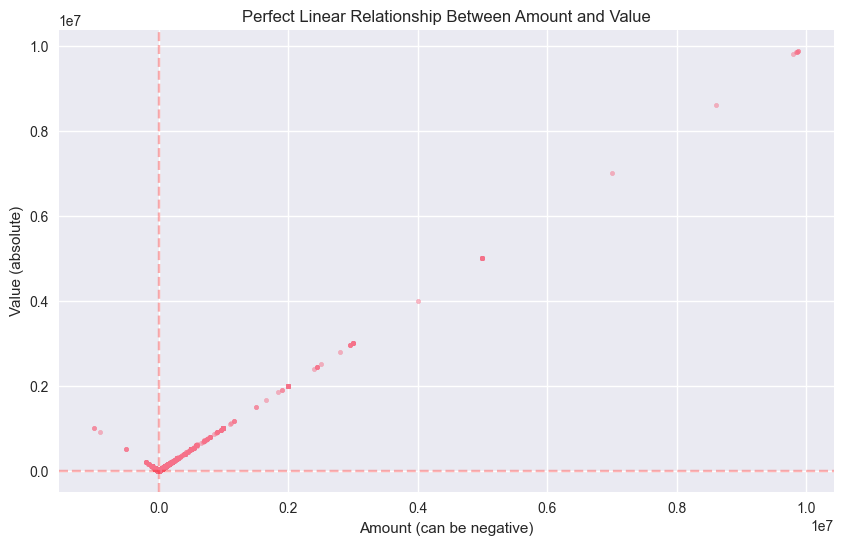

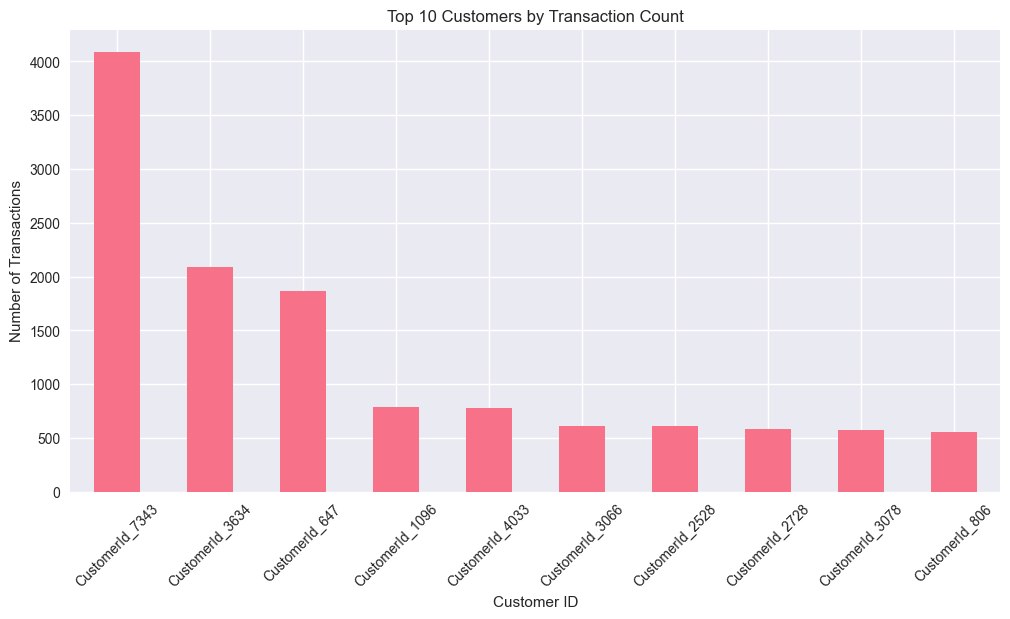

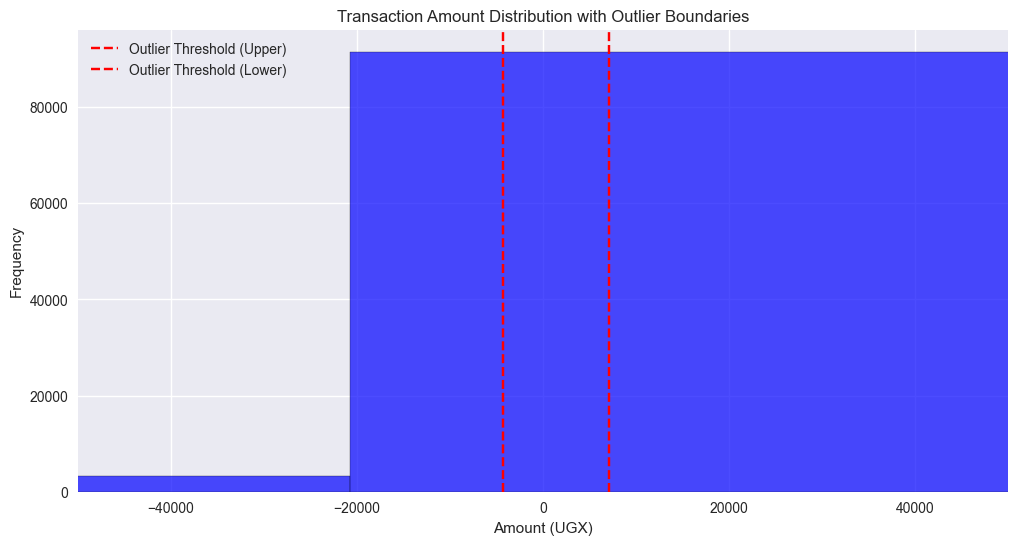

In [11]:
# 1. Fraud distribution visualization
fraud_counts = df['FraudResult'].value_counts()
plt.figure(figsize=(8, 5))
plt.pie(fraud_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Extreme Class Imbalance: Fraud vs Non-Fraud Transactions')
plt.show()

# 2. Amount vs Value scatter plot to show correlation
plt.figure(figsize=(10, 6))
plt.scatter(df['Amount'], df['Value'], alpha=0.5, s=10)
plt.xlabel('Amount (can be negative)')
plt.ylabel('Value (absolute)')
plt.title('Perfect Linear Relationship Between Amount and Value')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='--', alpha=0.3)
plt.show()

# 3. Top customers by transaction count
top_customers = df['CustomerId'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_customers.plot(kind='bar')
plt.title('Top 10 Customers by Transaction Count')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# 4. Transaction amount distribution with outliers highlighted
plt.figure(figsize=(12, 6))
plt.hist(df['Amount'], bins=100, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(x=7075, color='red', linestyle='--', label='Outlier Threshold (Upper)')
plt.axvline(x=-4325, color='red', linestyle='--', label='Outlier Threshold (Lower)')
plt.title('Transaction Amount Distribution with Outlier Boundaries')
plt.xlabel('Amount (UGX)')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(-50000, 50000)  # Zoom in for better visualization
plt.show()

In [2]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

# Set style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')

# Load model if not already in memory
# model = joblib.load('models/random_forest.pkl')  # or use existing rf_model variable

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Use a sample of test data for faster computation (100-200 rows)
X_sample = X_test.sample(min(200, len(X_test)), random_state=42)

# Calculate SHAP values
shap_values = explainer.shap_values(X_sample)

# For binary classification, shap_values is a list
# shap_values[0] = negative class, shap_values[1] = positive class (default/high-risk)
shap_values_risk = shap_values[1]  # for the risk class

# 1. GENERATE SUMMARY PLOT (Global Feature Importance)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values_risk, X_sample, show=False)
plt.title('SHAP Summary Plot: Feature Impact on Credit Risk', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('shap_summary_plot.png', dpi=150, bbox_inches='tight')
plt.show()

# 2. IDENTIFY HIGH AND LOW RISK SAMPLES
# Get predictions to find examples
predictions = rf_model.predict(X_sample)
probabilities = rf_model.predict_proba(X_sample)[:, 1]  # probability of high-risk

# Find a clear high-risk example (predicted as 1 with high confidence)
high_risk_indices = np.where((predictions == 1) & (probabilities > 0.8))[0]
high_risk_idx = high_risk_indices[0] if len(high_risk_indices) > 0 else 0

# Find a clear low-risk example (predicted as 0 with low probability)
low_risk_indices = np.where((predictions == 0) & (probabilities < 0.2))[0]
low_risk_idx = low_risk_indices[0] if len(low_risk_indices) > 0 else 1

# 3. WATERFALL PLOT - HIGH RISK CUSTOMER
plt.figure(figsize=(12, 8))
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_risk[high_risk_idx],
        base_values=explainer.expected_value[1],  # expected value for positive class
        data=X_sample.iloc[high_risk_idx],
        feature_names=X_sample.columns.tolist()
    ),
    show=False
)
plt.title(f'SHAP Waterfall Plot: High-Risk Customer (Risk Score: {probabilities[high_risk_idx]:.2%})', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('shap_waterfall_highrisk.png', dpi=150, bbox_inches='tight')
plt.show()

# 4. WATERFALL PLOT - LOW RISK CUSTOMER
plt.figure(figsize=(12, 8))
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_risk[low_risk_idx],
        base_values=explainer.expected_value[1],
        data=X_sample.iloc[low_risk_idx],
        feature_names=X_sample.columns.tolist()
    ),
    show=False
)
plt.title(f'SHAP Waterfall Plot: Low-Risk Customer (Risk Score: {probabilities[low_risk_idx]:.2%})', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('shap_waterfall_lowrisk.png', dpi=150, bbox_inches='tight')
plt.show()

# 5. (Optional) Print feature names for reference
print("Features used in model:")
for i, col in enumerate(X_sample.columns):
    print(f"{i+1}. {col}")

print(f"\nHigh-risk example index: {high_risk_idx}")
print(f"Low-risk example index: {low_risk_idx}")
print(f"\nExpected value (baseline): {explainer.expected_value[1]:.4f}")

# 6. Save SHAP values for later use
import pickle
with open('shap_values_sample.pkl', 'wb') as f:
    pickle.dump({
        'shap_values': shap_values_risk,
        'X_sample': X_sample,
        'explainer': explainer,
        'feature_names': X_sample.columns.tolist()
    }, f)
print("SHAP values saved to shap_values_sample.pkl")

NameError: name 'rf_model' is not defined